In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import math, random
import matplotlib.pyplot as plt
from scipy import special

# Define the number of outputs and the learning rate
n_input_1 = 2
n_input_2 = 1
n_nodes_hl1 = 30
n_nodes_hl2 = 30
n_nodes_hl3 = 30
n_nodes_hl4 = 30
n_nodes_hl5 = 30
n_nodes_hl6 = 30
n_nodes_hl7 = 30
n_nodes_hl8 = 30
n_output = 1
learn_rate = 0.00002

# Boundary Conditions
left_temp = 1
right_temp = 0
x_l = 0
C1 = 2.0
C2 = 2.0
s_ini = 0.1
T = 0
ini_temp = 0

# training data
t_pred = 0.6
N = 8000
N1 = 400 # Number of datapoints to describe B.C's
a = 0
b = 1
diff = (b-a)/N
x = []
t = []
x1 = []
t1 = []
for i in range(N):
    x1.append(a+i*diff) 
    t1.append(t_pred)
    x.append(random.uniform(0, 1))
    t.append(random.uniform(0, 1))
    if(i==N-1):
        for j in range(N1):
            x.append(0)
            t.append(random.uniform(0, 1))
            x.append(random.uniform(0, 1))
            t.append(0)
            
x1 = np.array(x1)
x1 = x1.reshape((N,1))
t1 = np.array(t1)
t1 = t1.reshape((N,1))
N = N + 2*N1            
x = np.array(x)
x = x.reshape((N,1))
t = np.array(t)
t = t.reshape((N,1))

# Placeholders
x_ph = tf.placeholder('float', [None, 1],name='input')
t_ph = tf.placeholder('float', [None, 1],name='input')
s_ph = tf.placeholder('float', [None, 1],name='input')
Ts_ph = tf.placeholder('float', [None, 1],name='input')

# number of epochs
n_epochs = 15000

# Define standard deviation for initialising weights and biases from normal distribution.
hl_sigma = 0.1

def NN1(x2, t2):
    data = tf.concat([x2, t2], 1)
    data = tf.cast(data, tf.float32)
    hidden_1_layer = {'weights': tf.Variable(tf.random.normal([n_input_1, n_nodes_hl1],stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl1], stddev=hl_sigma))}
    hidden_2_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl1, n_nodes_hl2], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl2], stddev=hl_sigma))}
    hidden_3_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl2, n_nodes_hl3], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl3], stddev=hl_sigma))}
    hidden_4_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl3, n_nodes_hl4], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl4], stddev=hl_sigma))}
    hidden_5_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl4, n_nodes_hl5], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl5], stddev=hl_sigma))}
    hidden_6_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl5, n_nodes_hl6], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl6], stddev=hl_sigma))}
    hidden_7_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl6, n_nodes_hl7], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl7], stddev=hl_sigma))}
    hidden_8_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl7, n_nodes_hl8], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl8], stddev=hl_sigma))}
    output_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl8, n_output], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_output], stddev=hl_sigma))}
           
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.tanh(l1)   
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.tanh(l2)
    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.tanh(l3)
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.tanh(l4)
    l5 = tf.add(tf.matmul(l4, hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.tanh(l5)
    l6 = tf.add(tf.matmul(l5, hidden_6_layer['weights']), hidden_6_layer['biases'])
    l6 = tf.nn.tanh(l6)
    l7 = tf.add(tf.matmul(l6, hidden_7_layer['weights']), hidden_7_layer['biases'])
    l7 = tf.nn.tanh(l7)
    l8 = tf.add(tf.matmul(l7, hidden_8_layer['weights']), hidden_8_layer['biases'])
    l8 = tf.nn.tanh(l8)
    output = tf.add(tf.matmul(l8, output_layer['weights']), output_layer['biases'], name='output')
    return output

def NN2(t2):
    
    data = tf.cast(t2, tf.float32)
    hidden_1_layer = {'weights': tf.Variable(tf.random.normal([n_input_2, n_nodes_hl1],stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl1], stddev=hl_sigma))}
    hidden_2_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl1, n_nodes_hl2], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl2], stddev=hl_sigma))}
    hidden_3_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl2, n_nodes_hl3], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl3], stddev=hl_sigma))}
    hidden_4_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl3, n_nodes_hl4], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl4], stddev=hl_sigma))}
    hidden_5_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl4, n_nodes_hl5], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl5], stddev=hl_sigma))}
    hidden_6_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl5, n_nodes_hl6], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl6], stddev=hl_sigma))}
    hidden_7_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl6, n_nodes_hl7], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl7], stddev=hl_sigma))}
    hidden_8_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl7, n_nodes_hl8], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl8], stddev=hl_sigma))}
    output_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl8, n_output], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_output], stddev=hl_sigma))}
           
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.tanh(l1)   
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.tanh(l2)
    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.tanh(l3)
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.tanh(l4)
    l5 = tf.add(tf.matmul(l4, hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.tanh(l5)
    l6 = tf.add(tf.matmul(l5, hidden_6_layer['weights']), hidden_6_layer['biases'])
    l6 = tf.nn.tanh(l6)
    l7 = tf.add(tf.matmul(l6, hidden_7_layer['weights']), hidden_7_layer['biases'])
    l7 = tf.nn.tanh(l7)
    l8 = tf.add(tf.matmul(l7, hidden_8_layer['weights']), hidden_8_layer['biases'])
    l8 = tf.nn.tanh(l8)
    output = tf.add(tf.matmul(l8, output_layer['weights']), output_layer['biases'], name='output')
    return output

def train_neural_network_batch():
    u = NN1(x_ph,t_ph)  
    dudx = tf.gradients(u, x_ph)
    dudx2 = tf.gradients(tf.gradients(u, x_ph), x_ph)
    dudt = tf.gradients(u, t_ph)
    
    s = NN2(t_ph)
    Ts = NN1(s, t_ph) 
    dTsdx = tf.gradients(Ts, s)
    dsdt = tf.gradients(s, t_ph)
    
        
    cost = tf.reduce_mean( tf.square((dudt-tf.constant(C1)*dudx2)*tf.cast(tf.less_equal(x_ph,s), tf.float32)) 
                          + tf.square(tf.cast(tf.equal(x_ph,x_l), tf.float32)*(u-left_temp)) 
                          + 15*tf.square(Ts-right_temp) 
                          + tf.square(tf.cast(tf.equal(t_ph,T), tf.float32)*(u-ini_temp)) 
                          + 15*tf.square(dsdt+tf.constant(C2)*dTsdx) 
                          + 15*tf.square(tf.cast(tf.equal(t_ph,T), tf.float32)*(s - s_ini)) )
    
    optimizer = tf.train.AdamOptimizer(learn_rate).minimize(cost)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(n_epochs):
            _, l = sess.run([optimizer,cost], feed_dict={x_ph:x, t_ph:t})
            
            if(epoch % 100 == 0):
                print('loss:-',l,', epoch:-',epoch)
                print( sess.run(tf.squeeze(s),{t_ph:t}) )
                if(l<=0.00005):
                    break

        # Validation
        return sess.run(tf.squeeze(s),{t_ph:t1}), sess.run(tf.squeeze(u),{x_ph:x1, t_ph:t1}), x1
    
# Run the code                              
s_pred, y_pred ,x_pred = train_neural_network_batch()
y_pred = y_pred.reshape(N-2*N1,1)

# Plot
cnt = 0
for i in range(len(x_pred)):
    cnt = cnt+1
    if x_pred[i]>s_pred[i]:
        break
    
plt.plot(x_pred[0:cnt], y_pred[0:cnt], label ='NN')
plt.legend()
plt.show()

loss:- 0.10816795 , epoch:- 0
[-0.11605412 -0.11607751 -0.1159729  ... -0.1158939  -0.11591733
 -0.1158939 ]
loss:- 0.059308853 , epoch:- 100
[-0.06824972 -0.06825901 -0.06821778 ... -0.06818705 -0.06819614
 -0.06818705]
loss:- 0.04388252 , epoch:- 200
[-0.02443825 -0.02443747 -0.0244422  ... -0.02444755 -0.0244458
 -0.02444755]


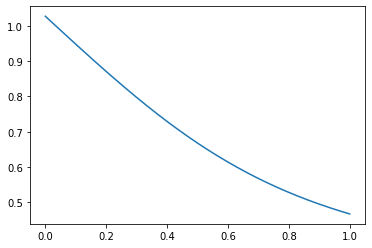

In [4]:
plt.plot(x_pred, y_pred, label ='NN')

# Trial-1

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import math, random
import matplotlib.pyplot as plt
from scipy import special

# Define the number of outputs and the learning rate
n_input_1 = 3
n_nodes_hl1 = 30
n_nodes_hl2 = 30
n_nodes_hl3 = 30
n_nodes_hl4 = 30
n_nodes_hl5 = 30
n_nodes_hl6 = 30
n_nodes_hl7 = 30
n_nodes_hl8 = 30
n_output = 1
learn_rate = 0.0002

# Boundary Conditions
left_temp = 1
right_temp = 0
x_0 = 0
x_l = 0.2
x_r = 1 
C1 = 0.2
C2 = 2.0
T_ini = 0
ini_temp = 0

# training data
t_pred = 0.4
x_lim_loc = 0.9
N = 3000
N_bc = 400 # Number of datapoints to describe B.C's
N_xlim = 80
diff1 = (x_l-0)/N
diff2 = (x_r - x_l)/N_xlim

x = []
t = []
x_lim = []

x1 = []
t1 = []
x_lim1 = []

for i in range(N):
    x1.append(x_l+i*diff1) 
    t1.append(t_pred)
    x_lim1.append(x_lim_loc)
    x.append(random.uniform(0, 1))
    t_feed.append(random.uniform(0, 1))
    if(i==N-1):
        for j in range(N_bc):
            x.append(0)
            t_feed.append(random.uniform(0, 1))
            x.append(random.uniform(0, 1))
            t_feed.append(0)
            t_feed.append(random.uniform(0, 1))
            
for i in range(N_bc):
    x_lim.append(x_l+i*diff2) 

N1 = N

x1 = np.array(x1)
x1 = x1.reshape((N1,1))
t1 = np.array(t1)
t1 = t1.reshape((N1,1))
x_lim1 = np.array(x_lim1)
x_lim1 = x_lim1.reshape((N1,1))
    
N = len(x)
x = np.array(x)
x = x.reshape((N,1))

N = len(t_feed)
t_feed = np.array(t_feed)
t_feed = t_feed.reshape((N,1))

# Placeholders
x_ph = tf.placeholder('float', [None, 1],name='input')
t_ph = tf.placeholder('float', [None, 1],name='input')
c_ph = tf.placeholder('float', [None, 1],name='input')

# number of epochs
n_epochs = 100

# Define standard deviation for initialising weights and biases from normal distribution.
hl_sigma = 0.15

def NN1(x2, t2, xlim):
    data = tf.concat([x2, t2, xlim], 1)
    data = tf.cast(data, tf.float32)
    hidden_1_layer = {'weights': tf.Variable(tf.random.normal([n_input_1, n_nodes_hl1],stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl1], stddev=hl_sigma))}
    hidden_2_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl1, n_nodes_hl2], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl2], stddev=hl_sigma))}
    hidden_3_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl2, n_nodes_hl3], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl3], stddev=hl_sigma))}
    hidden_4_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl3, n_nodes_hl4], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl4], stddev=hl_sigma))}
    hidden_5_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl4, n_nodes_hl5], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl5], stddev=hl_sigma))}
    hidden_6_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl5, n_nodes_hl6], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl6], stddev=hl_sigma))}
    hidden_7_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl6, n_nodes_hl7], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl7], stddev=hl_sigma))}
    hidden_8_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl7, n_nodes_hl8], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl8], stddev=hl_sigma))}
    output_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl8, n_output], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_output], stddev=hl_sigma))}
           
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.tanh(l1)   
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.tanh(l2)
    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.tanh(l3)
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.tanh(l4)
    l5 = tf.add(tf.matmul(l4, hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.tanh(l5)
    l6 = tf.add(tf.matmul(l5, hidden_6_layer['weights']), hidden_6_layer['biases'])
    l6 = tf.nn.tanh(l6)
    l7 = tf.add(tf.matmul(l6, hidden_7_layer['weights']), hidden_7_layer['biases'])
    l7 = tf.nn.tanh(l7)
    l8 = tf.add(tf.matmul(l7, hidden_8_layer['weights']), hidden_8_layer['biases'])
    l8 = tf.nn.tanh(l8)
    output = tf.add(tf.matmul(l8, output_layer['weights']), output_layer['biases'], name='output')
    return output

def train_neural_network_batch():
    u = NN1(x_ph,t_ph,x_lim_ph)  
    dudx = tf.gradients(u, x_ph)
    dudx2 = tf.gradients(tf.gradients(u, x_ph), x_ph)
    dudt = tf.gradients(u, t_ph)
        
    cost = tf.reduce_mean( tf.square((dudt-tf.constant(C1)*dudx2)*tf.cast(tf.less_equal(x_ph,x_lim_ph), tf.float32)) 
                          + 10*tf.square(tf.cast(tf.equal(x_ph,0), tf.float32)*(u-left_temp)) 
                          + 10*tf.square(tf.cast(tf.equal(x_ph,x_lim_ph), tf.float32)*(u-right_temp)) 
                          + tf.square(tf.cast(tf.equal(t_ph,T_ini), tf.float32)*(u-ini_temp)) )
    
    optimizer = tf.train.AdamOptimizer(learn_rate).minimize(cost)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(n_epochs):
 
            for i in x_lim:
                
                x_temp = []
                for j in range(N_bc):
                    x_temp.append(i)
                
                x_temp = np.array(x_temp)
                x_temp = x_temp.reshape((N_bc,1))
                x_feed = np.concatenate((x, x_temp), axis=0)
                
                x_lim_feed = []
                for j in range(N):
                    x_lim_feed.append(i)
                    
                x_lim_feed = np.array(x_lim_feed)
                x_lim_feed = x_lim_feed.reshape((N,1))
                    
                _, l = sess.run([optimizer,cost], feed_dict={x_ph:x_feed, t_ph:t_feed, x_lim_ph:x_lim_feed})
            
                print('loss:-',l,', epoch:-',epoch)
                
                if(l<=0.00005):
                    break

        # Validation
        return sess.run(tf.squeeze(u),{x_ph:x1, t_ph:t1, x_lim_ph:x_lim1}), x1
    
# Run the code                              
y_pred, x_pred = train_neural_network_batch()
y_pred = y_pred.reshape(N1,1)

cnt = 0
for i in range(len(x1)):
    cnt = cnt+1
    if x1[i]>x_lim_loc:
        break
        
plt.plot(x1[0:cnt], y_pred[0:cnt])

# Trial-2

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import math, random
import matplotlib.pyplot as plt
from scipy import special

# Define the number of outputs and the learning rate
n_input_1 = 3
n_nodes_hl1 = 30
n_nodes_hl2 = 30
n_nodes_hl3 = 30
n_nodes_hl4 = 30
n_nodes_hl5 = 30
n_nodes_hl6 = 30
n_nodes_hl7 = 30
n_nodes_hl8 = 30
n_output = 1
learn_rate = 0.0002

# Boundary Conditions
left_temp = 1
right_temp = 0
x_l = 0
x_r = 1 
T_ini = 0
ini_temp = 0

# training data
t_pred = 0.2
c_pred = 0.8
N1 = 6000
N_bc = 400 # Number of datapoints to describe B.C's
diff = (x_r-x_l)/N1

x = []
t = []
c = []

for i in range(N1):
    x.append(random.uniform(0, 1))
    c.append(random.uniform(0, 1))
    t.append(random.uniform(0, 1))
    if(i==N1-1):
        for j in range(N_bc):
            x.append(x_l)
            t.append(random.uniform(0, 1))
            c.append(random.uniform(0, 1))
            x.append(x_r)
            t.append(random.uniform(0, 1))
            c.append(random.uniform(0, 1))
            x.append(random.uniform(0, 1))
            t.append(T_ini)
            c.append(random.uniform(0, 1))
    
N = len(x)

x = np.array(x)
x = x.reshape((N,1))
t = np.array(t)
t = t.reshape((N,1))
c = np.array(c)
c = c.reshape((N,1))

# Placeholders
x_ph = tf.placeholder('float', [None, 1],name='input')
t_ph = tf.placeholder('float', [None, 1],name='input')
c_ph = tf.placeholder('float', [None, 1],name='input')

# number of epochs
n_epochs = 10000

# Define standard deviation for initialising weights and biases from normal distribution.
hl_sigma = 0.15

def NN1(x2, t2, c2):
    data = tf.concat([x2, t2, c2], 1)
    data = tf.cast(data, tf.float32)
    hidden_1_layer = {'weights': tf.Variable(tf.random.normal([n_input_1, n_nodes_hl1],stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl1], stddev=hl_sigma))}
    hidden_2_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl1, n_nodes_hl2], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl2], stddev=hl_sigma))}
    hidden_3_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl2, n_nodes_hl3], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl3], stddev=hl_sigma))}
    hidden_4_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl3, n_nodes_hl4], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl4], stddev=hl_sigma))}
    hidden_5_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl4, n_nodes_hl5], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl5], stddev=hl_sigma))}
    hidden_6_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl5, n_nodes_hl6], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl6], stddev=hl_sigma))}
    hidden_7_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl6, n_nodes_hl7], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl7], stddev=hl_sigma))}
    hidden_8_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl7, n_nodes_hl8], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_nodes_hl8], stddev=hl_sigma))}
    output_layer = {'weights': tf.Variable(tf.random.normal([n_nodes_hl8, n_output], stddev=hl_sigma)),
                      'biases': tf.Variable(tf.random.normal([n_output], stddev=hl_sigma))}
           
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.tanh(l1)   
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.tanh(l2)
    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.tanh(l3)
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.tanh(l4)
    l5 = tf.add(tf.matmul(l4, hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.tanh(l5)
    l6 = tf.add(tf.matmul(l5, hidden_6_layer['weights']), hidden_6_layer['biases'])
    l6 = tf.nn.tanh(l6)
    l7 = tf.add(tf.matmul(l6, hidden_7_layer['weights']), hidden_7_layer['biases'])
    l7 = tf.nn.tanh(l7)
    l8 = tf.add(tf.matmul(l7, hidden_8_layer['weights']), hidden_8_layer['biases'])
    l8 = tf.nn.tanh(l8)
    output = tf.add(tf.matmul(l8, output_layer['weights']), output_layer['biases'], name='output')

    wts = []
    wts.append(hidden_1_layer['weights'])
    wts.append(hidden_2_layer['weights'])
    wts.append(hidden_3_layer['weights'])
    wts.append(hidden_4_layer['weights'])
    wts.append(hidden_5_layer['weights'])
    wts.append(hidden_6_layer['weights'])
    wts.append(hidden_7_layer['weights'])
    wts.append(hidden_8_layer['weights'])
    wts.append(output_layer['weights'])
    
    bia = []
    bia.append(hidden_1_layer['biases'])
    bia.append(hidden_2_layer['biases'])
    bia.append(hidden_3_layer['biases'])
    bia.append(hidden_4_layer['biases'])
    bia.append(hidden_5_layer['biases'])
    bia.append(hidden_6_layer['biases'])
    bia.append(hidden_7_layer['biases'])
    bia.append(hidden_8_layer['biases'])
    bia.append(output_layer['biases'])
    
    return wts, bia, output

def train_neural_network_batch():
    wts,bia,u = NN1(x_ph,t_ph,c_ph)  
    dudx = tf.gradients(u, x_ph)
    dudx2 = tf.gradients(tf.gradients(u, x_ph), x_ph)
    dudt = tf.gradients(u, t_ph)
        
    cost = tf.reduce_mean( tf.square(dudt-c_ph*dudx2) 
                          + 10*tf.square(tf.cast(tf.equal(x_ph,x_l), tf.float32)*(u-left_temp)) 
                          + 10*tf.square(tf.cast(tf.equal(x_ph,x_r), tf.float32)*(u-right_temp)) 
                          + tf.square(tf.cast(tf.equal(t_ph,T_ini), tf.float32)*(u-ini_temp)) )
    
    optimizer = tf.train.AdamOptimizer(learn_rate).minimize(cost)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(n_epochs):
                    
                _, l = sess.run([optimizer,cost], feed_dict={x_ph:x, t_ph:t, c_ph:c})
                
                if(epoch % 100 == 0):
                    print('loss:-',l,', epoch:-',epoch)
                if(l<=0.00005):
                    break

        # Validation
        return sess.run(wts,{x_ph:x, t_ph:t, c_ph:c}), sess.run(bia,{x_ph:x, t_ph:t, c_ph:c})
    
# Run the code                              
wts, bia = train_neural_network_batch()

Instructions for updating:
non-resource variables are not supported in the long term
loss:- 0.8022792 , epoch:- 0
loss:- 0.11773837 , epoch:- 100
loss:- 0.04468594 , epoch:- 200


KeyboardInterrupt: 

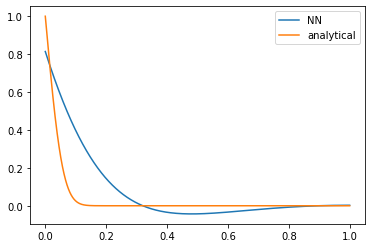

In [67]:
x1 = []
t1 = []
c1 = []

t_pred = 0.001
c_pred = 1

for i in range(N1):
    x1.append(x_l+i*diff) 
    t1.append(t_pred)
    c1.append(c_pred)
    
x1 = np.array(x1)
x1 = x1.reshape((N1,1))
t1 = np.array(t1)
t1 = t1.reshape((N1,1))
c1 = np.array(c1)
c1 = c1.reshape((N1,1))

# Neural Network Solution
l = np.concatenate([x1, t1, c1], 1)
for i in range(len(wts)):
    l = np.matmul(l,wts[i]) + bia[i]
    if(i<len(wts)-1):
        l = np.tanh(l)
    
# Analytical Solution
y1 = []
i = 1
y1 = -2*(-1)**(i+1)/(i*np.pi)*np.sin(i*np.pi*x1)*np.exp(-i**2*np.pi**2*c_pred*t_pred)
for i in range(2, 49, 1):
    y1 += -2*(-1)**(i+1)/(i*np.pi)*np.sin(i*np.pi*x1)*np.exp(-i**2*np.pi**2*c_pred*t_pred)   
y1 += x1
y1 = np.flip(y1)
    
plt.plot(x1, l, label ='NN')
plt.plot(x1, y1, label ='analytical')
plt.legend()
plt.show()

In [1]:
"""
@author: Computational Domain
"""

import torch
import torch.nn as nn
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
import matplotlib.animation as animation

nu = 0.01

class NavierStokes():
    def __init__(self, X, Y, T, u, v):

        self.x = torch.tensor(X, dtype=torch.float32, requires_grad=True)
        self.y = torch.tensor(Y, dtype=torch.float32, requires_grad=True)
        self.t = torch.tensor(T, dtype=torch.float32, requires_grad=True)

        self.u = torch.tensor(u, dtype=torch.float32)
        self.v = torch.tensor(v, dtype=torch.float32)

        #null vector to test against f and g:
        self.null = torch.zeros((self.x.shape[0], 1))

        # initialize network:
        self.network()

        self.optimizer = torch.optim.LBFGS(self.net.parameters(), lr=1, max_iter=200000, max_eval=50000,
                                           history_size=50, tolerance_grad=1e-05, tolerance_change=0.5 * np.finfo(float).eps,
                                           line_search_fn="strong_wolfe")

        self.mse = nn.MSELoss()

        #loss
        self.ls = 0

        #iteration number
        self.iter = 0

    def network(self):

        self.net = nn.Sequential(
            nn.Linear(3, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 2))

    def function(self, x, y, t):

        res = self.net(torch.hstack((x, y, t)))
        psi, p = res[:, 0:1], res[:, 1:2]

        u = torch.autograd.grad(psi, y, grad_outputs=torch.ones_like(psi), create_graph=True)[0] #retain_graph=True,
        v = -1.*torch.autograd.grad(psi, x, grad_outputs=torch.ones_like(psi), create_graph=True)[0]

        u_x = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
        u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u_x), create_graph=True)[0]
        u_y = torch.autograd.grad(u, y, grad_outputs=torch.ones_like(u), create_graph=True)[0]
        u_yy = torch.autograd.grad(u_y, y, grad_outputs=torch.ones_like(u_y), create_graph=True)[0]
        u_t = torch.autograd.grad(u, t, grad_outputs=torch.ones_like(u), create_graph=True)[0]

        v_x = torch.autograd.grad(v, x, grad_outputs=torch.ones_like(v), create_graph=True)[0]
        v_xx = torch.autograd.grad(v_x, x, grad_outputs=torch.ones_like(v_x), create_graph=True)[0]
        v_y = torch.autograd.grad(v, y, grad_outputs=torch.ones_like(v), create_graph=True)[0]
        v_yy = torch.autograd.grad(v_y, y, grad_outputs=torch.ones_like(v_y), create_graph=True)[0]
        v_t = torch.autograd.grad(v, t, grad_outputs=torch.ones_like(v), create_graph=True)[0]

        p_x = torch.autograd.grad(p, x, grad_outputs=torch.ones_like(p), create_graph=True)[0]
        p_y = torch.autograd.grad(p, y, grad_outputs=torch.ones_like(p), create_graph=True)[0]

        f = u_t + u * u_x + v * u_y + p_x - nu * (u_xx + u_yy)
        g = v_t + u * v_x + v * v_y + p_y - nu * (v_xx + v_yy)

        return u, v, p, f, g

    def closure(self):
        # reset gradients to zero:
        self.optimizer.zero_grad()

        # u, v, p, g and f predictions:
        u_prediction, v_prediction, p_prediction, f_prediction, g_prediction = self.function(self.x, self.y, self.t)

        # calculate losses
        u_loss = self.mse(u_prediction, self.u)
        v_loss = self.mse(v_prediction, self.v)
        f_loss = self.mse(f_prediction, self.null)
        g_loss = self.mse(g_prediction, self.null)
        self.ls = u_loss + v_loss + f_loss +g_loss

        # derivative with respect to net's weights:
        self.ls.backward()

        self.iter += 1
        if not self.iter % 1:
            print('Iteration: {:}, Loss: {:0.6f}'.format(self.iter, self.ls))

        return self.ls

    def train(self):

        # training loop
        self.net.train()
        self.optimizer.step(self.closure)

N_train = 5000

data = scipy.io.loadmat('cylinder_wake.mat')

U_star = data['U_star']  # N x 2 x T
P_star = data['p_star']  # N x T
t_star = data['t']  # T x 1
X_star = data['X_star']  # N x 2

N = X_star.shape[0]
T = t_star.shape[0]

x_test = X_star[:, 0:1]
y_test = X_star[:, 1:2]
p_test = P_star[:, 0:1]
u_test = U_star[:, 0:1, 0]
t_test = np.ones((x_test.shape[0], x_test.shape[1]))

# Rearrange Data
XX = np.tile(X_star[:, 0:1], (1, T))  # N x T
YY = np.tile(X_star[:, 1:2], (1, T))  # N x T
TT = np.tile(t_star, (1, N)).T  # N x T

UU = U_star[:, 0, :]  # N x T
VV = U_star[:, 1, :]  # N x T
PP = P_star  # N x T

x = XX.flatten()[:, None]  # NT x 1
y = YY.flatten()[:, None]  # NT x 1
t = TT.flatten()[:, None]  # NT x 1

u = UU.flatten()[:, None]  # NT x 1
v = VV.flatten()[:, None]  # NT x 1
p = PP.flatten()[:, None]  # NT x 1

# Training Data
idx = np.random.choice(N * T, N_train, replace=False)
x_train = x[idx, :]
y_train = y[idx, :]
t_train = t[idx, :]
u_train = u[idx, :]
v_train = v[idx, :]

'''
pinn = NavierStokes(x_train, y_train, t_train, u_train, v_train)

pinn.train()

torch.save(pinn.net.state_dict(), 'model.pt')
'''

pinn = NavierStokes(x_train, y_train, t_train, u_train, v_train)
pinn.net.load_state_dict(torch.load('model.pt'))
pinn.net.eval()

x_test = torch.tensor(x_test, dtype=torch.float32, requires_grad=True)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=True)
t_test = torch.tensor(t_test, dtype=torch.float32, requires_grad=True)

u_out, v_out, p_out, f_out, g_out = pinn.function(x_test, y_test, t_test)

u_plot = p_out.data.cpu().numpy()
u_plot = np.reshape(u_plot, (50, 100))

fig, ax = plt.subplots()

plt.contourf(u_plot, levels=30, cmap='jet')
plt.colorbar()
#plt.show()

def animate(i):
    ax.clear()
    u_out, v_out, p_out, f_out, g_out = pinn.function(x_test, y_test, i*t_test)
    u_plot = p_out.data.cpu().numpy()
    u_plot = np.reshape(u_plot, (50, 100))
    cax = ax.contourf(u_plot, levels=20, cmap='jet')
    plt.xlabel(r'$x$')
    plt.xlabel(r'$y$')
    plt.title(r'$p(x,\; y, \; t)$')

# Call animate method
ani = animation.FuncAnimation(fig, animate, 20, interval=1, blit=False)
#ani.save('p_field_lbfgs.gif')
#plt.close()
# Display the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'cylinder_wake.mat'